# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [6]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv("SUSY-small.csv", dtype='float64', names=VarNames)
df.shape

(500000, 19)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [ ]:
#python3 -m venv sklearn-env
#source sklearn-env/bin/activate  # activate
#pip3 install -U scikit-learn

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
from sklearn import metrics
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [7]:
N_Train=400000

train_df = df.iloc[:N_Train]
test_df = df.iloc[N_Train:]
print(test_df['signal'].value_counts())
X_train = train_df.drop('signal', axis=1)
y_train = train_df['signal']

X_test = test_df.drop('signal', axis=1)
y_test = test_df['signal']

Test_sig=test_df[test_df.signal==1]
Test_bkg=test_df[test_df.signal==0]


signal
0.0    54041
1.0    45959
Name: count, dtype: int64


We can train the classifier as follow:

In [8]:
Fisher.fit(X_train, y_train)


LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

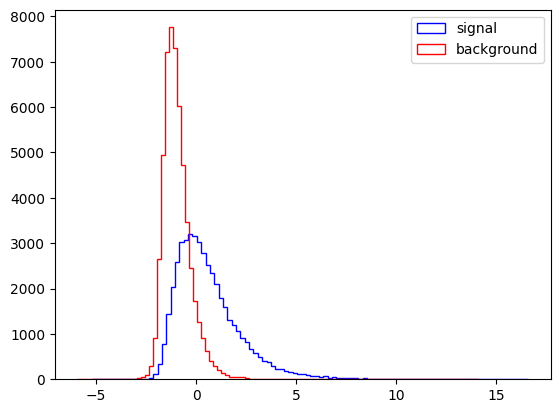

In [9]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

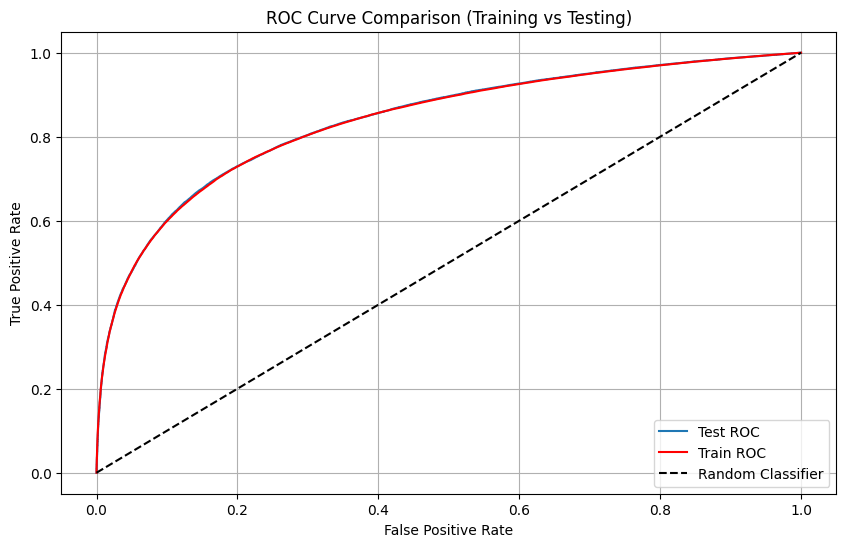

In [10]:

def plot_train_test_roc(X_train, y_train, X_test, y_test,model=Fisher):

    model.fit(X_train, y_train)

    train_scores = model.decision_function(X_train)
    test_scores = model.decision_function(X_test)

    false_positive_rate_train, true_positive_rate_train, _ = metrics.roc_curve(y_train, train_scores)
    false_positive_rate_test, true_positive_rate_test, _ = metrics.roc_curve(y_test, test_scores)

    return false_positive_rate_train, true_positive_rate_train, false_positive_rate_test, true_positive_rate_test

roc_data = plot_train_test_roc(X_train, y_train, X_test, y_test)

plt.figure(figsize=(10, 6))

plt.plot(roc_data[2], roc_data[3], label="Test ROC")
plt.plot(roc_data[0], roc_data[1], label="Train ROC", color="red")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training vs Testing)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

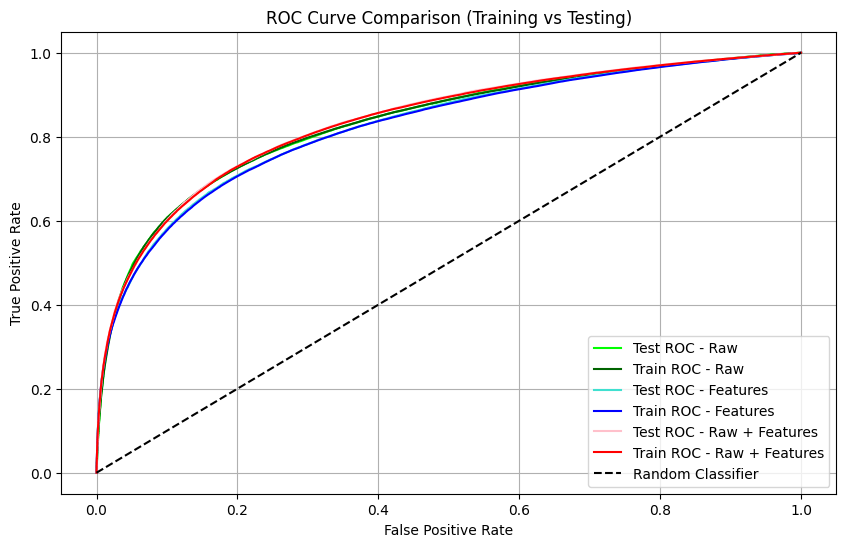

In [13]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

X_train_raw = X_train[RawNames]
X_test_raw = X_test[RawNames]

X_train_feat = X_train[FeatureNames]
X_test_feat = X_test[FeatureNames]

X_train_both = X_train[VarNames[1:]]
X_test_both = X_test[VarNames[1:]]

roc_data_raw = plot_train_test_roc(X_train_raw, y_train, X_test_raw, y_test)
roc_data_feat = plot_train_test_roc(X_train_feat, y_train, X_test_feat, y_test)
roc_data_both = plot_train_test_roc(X_train_both, y_train, X_test_both, y_test)

plt.figure(figsize=(10, 6))

plt.plot(roc_data_raw[2], roc_data_raw[3], label="Test ROC - Raw", color="lime")
plt.plot(roc_data_raw[0], roc_data_raw[1], label="Train ROC - Raw", color="darkgreen")

plt.plot(roc_data_feat[2], roc_data_feat[3], label="Test ROC - Features", color="turquoise")
plt.plot(roc_data_feat[0], roc_data_feat[1], label="Train ROC - Features", color="blue")

plt.plot(roc_data_both[2], roc_data_both[3], label="Test ROC - Raw + Features", color="pink")
plt.plot(roc_data_both[0], roc_data_both[1], label="Train ROC - Raw + Features", color="red")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training vs Testing)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = tree.DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

In [14]:
def plot_train_test_roc(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)

    # Use decision_function if available; otherwise, fall back to predict_proba
    if hasattr(model, "decision_function"):
        train_scores = model.decision_function(X_train)
        test_scores = model.decision_function(X_test)
    else:
        train_scores = model.predict_proba(X_train)[:, 1]
        test_scores = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, train_scores)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, test_scores)

    return fpr_train, tpr_train, fpr_test, tpr_test


In [15]:
roc_data_rf = plot_train_test_roc(X_train_both, y_train, X_test_both, y_test, rf)
roc_data_dt = plot_train_test_roc(X_train_both, y_train, X_test_both, y_test, dt)
roc_data_lr = plot_train_test_roc(X_train_both, y_train, X_test_both, y_test, lr)


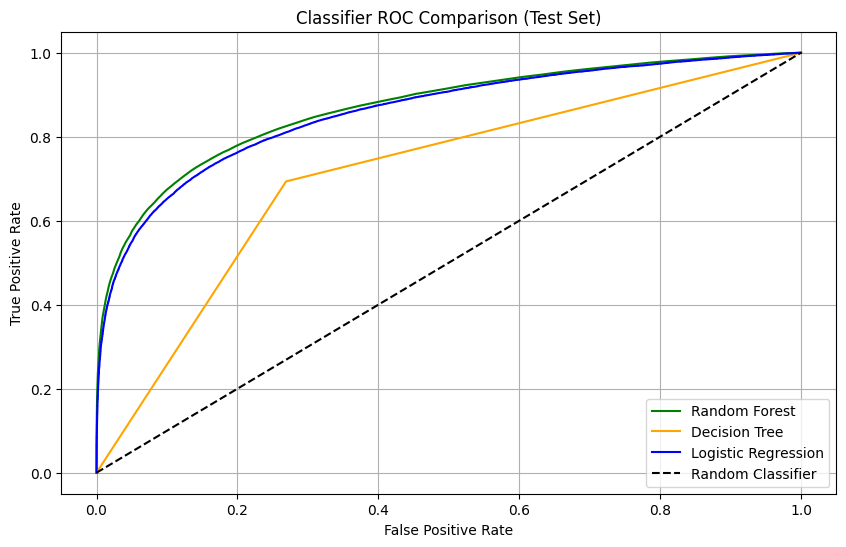

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(roc_data_rf[2], roc_data_rf[3], label="Random Forest", color="green")
plt.plot(roc_data_dt[2], roc_data_dt[3], label="Decision Tree", color="orange")
plt.plot(roc_data_lr[2], roc_data_lr[3], label="Logistic Regression", color="blue")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifier ROC Comparison (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

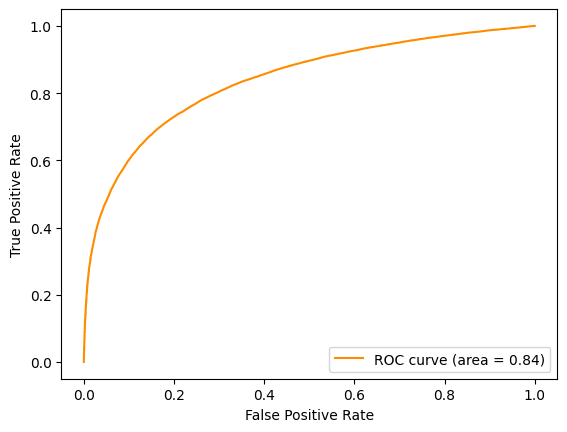

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, Fisher.decision_function(X_test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [21]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

rf_scores = rf.predict_proba(X_test_both)[:, 1]

#ROC
fpr, tpr, thresholds = roc_curve(y_test, rf_scores)
roc_auc = auc(fpr, tpr) #AUC
#FPR
best_significance = 0
best_threshold = 0
for i in range(len(thresholds)):
    threshold = thresholds[i]
    y_pred = rf_scores >= threshold
    NS = np.sum((y_test == 1) & (y_pred == 1))
    NB = np.sum((y_test == 0) & (y_pred == 1))
    if NS + NB > 0:
        sigma = NS / np.sqrt(NS + NB)
        if sigma > best_significance:
            best_significance = sigma
            best_threshold = threshold

y_pred_opt = rf_scores >= best_threshold

precision = precision_score(y_test, y_pred_opt)
recall = recall_score(y_test, y_pred_opt) #TPR
f1 = f1_score(y_test, y_pred_opt)
accuracy = accuracy_score(y_test, y_pred_opt)

#FPR
tpr_opt = np.sum((y_test == 1) & (y_pred_opt == 1)) / np.sum(y_test == 1)
fpr_opt = np.sum((y_test == 0) & (y_pred_opt == 1)) / np.sum(y_test == 0)
results = {
    "Metric": [
        "True Positive Rate (Recall)",
        "False Positive Rate",
        "Precision",
        "F1 Score",
        "Accuracy",
        "ROC AUC",
        "Max Significance σS"
    ],
    "Value": [
        tpr_opt,
        fpr_opt,
        precision,
        f1,
        accuracy,
        roc_auc,
        best_significance
    ]
}

# Here's that nice table
results_df = pd.DataFrame(results)
display(HTML(results_df.to_html(index=False, float_format="%.4f")))


Metric,Value
True Positive Rate (Recall),0.7846
False Positive Rate,0.2067
Precision,0.7635
F1 Score,0.7739
Accuracy,0.7893
ROC AUC,0.8684
Max Significance σS,165.9269
